# Tuần 4: Phép lọc (Filters)


Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html

- `mode`: str {‘full’, ‘valid’, ‘same’}, optional
             A string indicating the size of the output:

            + full
                The output is the full discrete linear cross-correlation of the inputs. (Default)

            + valid
                The output consists only of those elements that do not rely on the zero-padding. In ‘valid’ mode, either in1 or in2 must be at least as large as the other in every dimension.

            + same
                The output is the same size as in1, centered with respect to the ‘full’ output.

- `boundary` : str {‘fill’, ‘wrap’, ‘symm’}, optional
                A flag indicating how to handle boundaries:

            + fill
                pad input arrays with fillvalue. (default)

            + wrap
                circular boundary conditions.

            + symm
                symmetrical boundary conditions.

- `fillvalue` : scalar, optional
                Value to fill pad input arrays with. Default is 0.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]

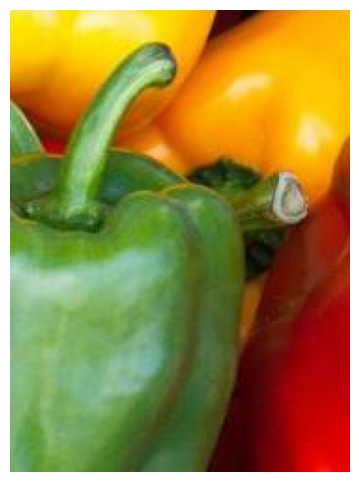

In [2]:
image = cv2.imread("pepper.jpg")
plt.imshow(image[...,::-1])
plt.axis("off");

In [3]:
def rgb_filter(image, kernel, mode='full', boundary='fill'):
    b,g,r = cv2.split(image)
    b = signal.correlate2d(b, kernel, mode=mode, boundary=boundary)
    g = signal.correlate2d(g, kernel, mode=mode, boundary=boundary)
    r = signal.correlate2d(r, kernel, mode=mode, boundary=boundary)
    output = cv2.merge([b,g,r])
    return output

Original shape:  (248, 182, 3)
Filtered shape:  (268, 202, 3)


(np.float64(-0.5), np.float64(201.5), np.float64(267.5), np.float64(-0.5))

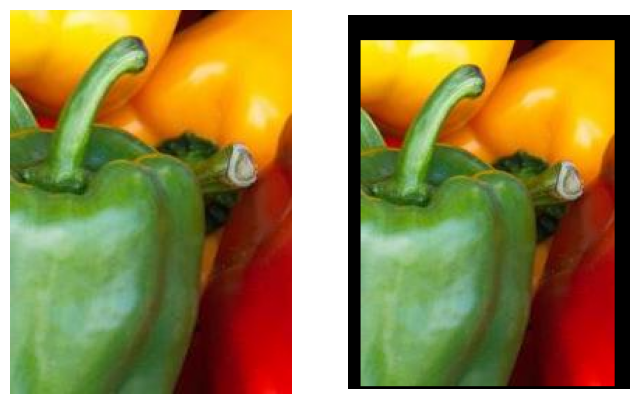

In [4]:
# make a kernel
kernel = np.zeros((21, 21), dtype='uint8')
kernel[2,11] = 1

# MxN, mxn,
# FUll: M+m-1 = 248 + 21 -1
# do cross correlation
fimage = rgb_filter(image, kernel, mode='full', boundary='fill')

# check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)

# view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

Original shape:  (248, 182, 3)
Filtered shape:  (268, 202, 3)


(np.float64(-0.5), np.float64(201.5), np.float64(267.5), np.float64(-0.5))

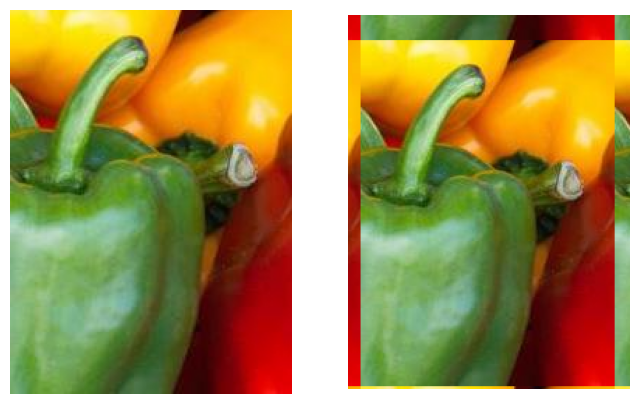

In [5]:
# do cross correlation
fimage = rgb_filter(image, kernel, mode='full', boundary='wrap')

# check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)

# view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

Original shape:  (248, 182, 3)
Filtered shape:  (268, 202, 3)


(np.float64(-0.5), np.float64(201.5), np.float64(267.5), np.float64(-0.5))

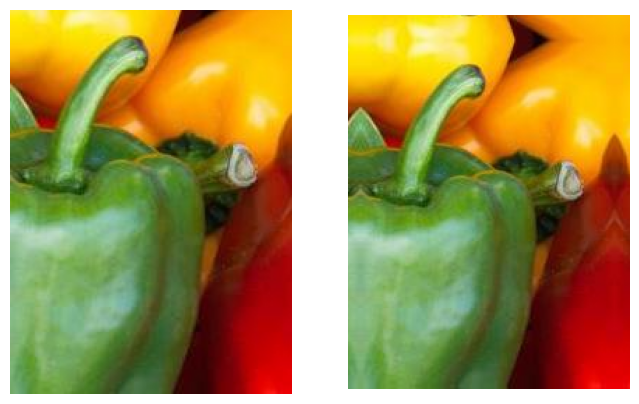

In [6]:
#symmetry boundary
fimage = rgb_filter(image, kernel, mode='full', boundary='symm')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

Original shape:  (248, 182, 3)
Filtered shape:  (228, 162, 3)


(np.float64(-0.5), np.float64(161.5), np.float64(227.5), np.float64(-0.5))

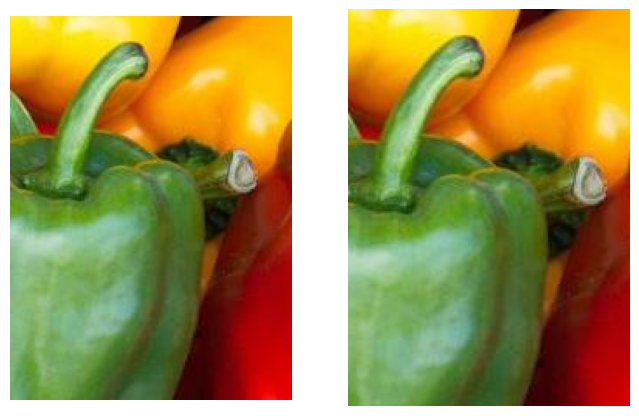

In [7]:
# valid filtering
fimage = rgb_filter(image, kernel, mode='valid', boundary='symm')

# check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)  ##should decrease

# view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

Original shape:  (248, 182, 3)
Filtered shape:  (248, 182, 3)


(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

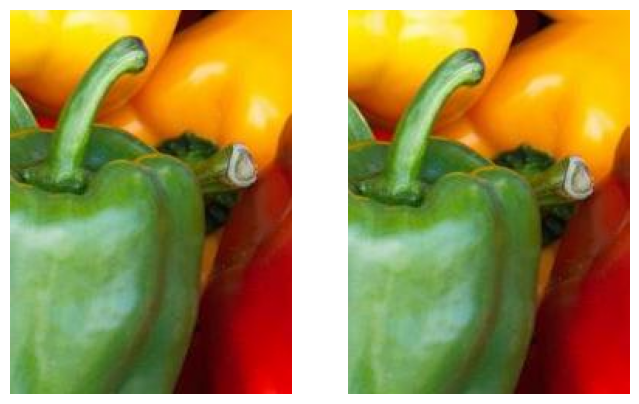

In [8]:
# same filtering
fimage = rgb_filter(image, kernel, mode='same', boundary='symm')

# check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)  ##equal

# view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

## Using opencv


In [9]:
cv2.filter2D

<function filter2D>

Original shape:  (248, 182, 3)
Filtered shape:  (248, 182, 3)


(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

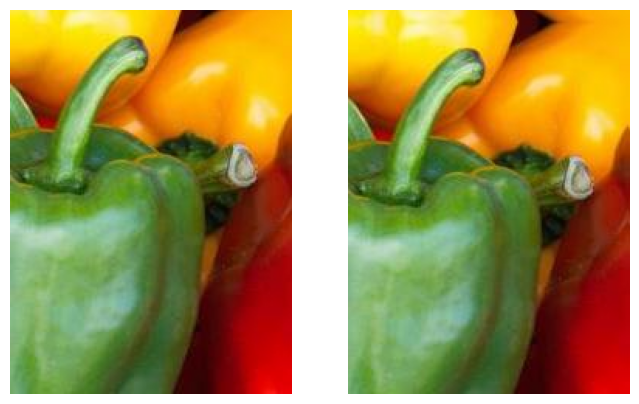

In [10]:
fimage = cv2.filter2D(image, -1, kernel, cv2.BORDER_DEFAULT)

# check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)  ## should decrease

# view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

## Averaging

(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

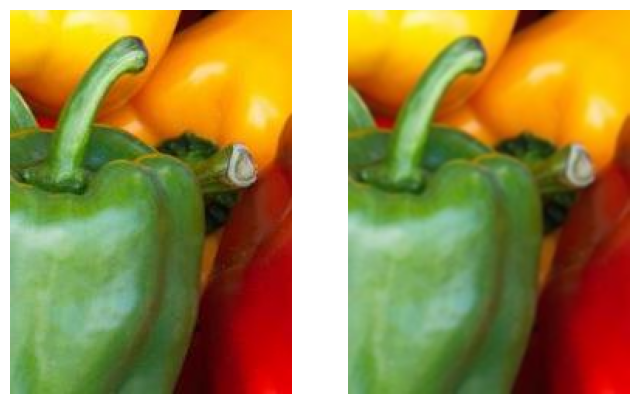

In [11]:
kernel = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

# averaging for a smoothing effect
fimage = cv2.filter2D(image, -1, kernel)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

## Gaussian Filtering

(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

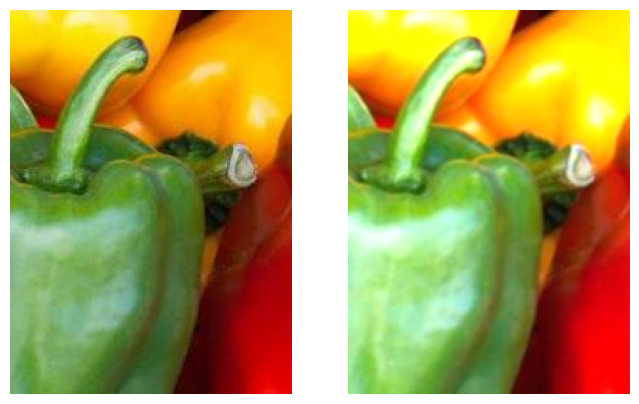

In [12]:
# gaussian kernel
kernel = 1/12 * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

fimage = cv2.filter2D(image, -1, kernel)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

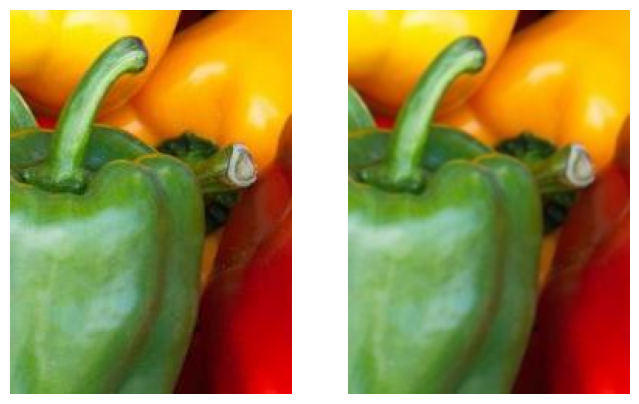

In [13]:
# or using GaussianBlur
fimage = cv2.GaussianBlur(image, (3,3), 0) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

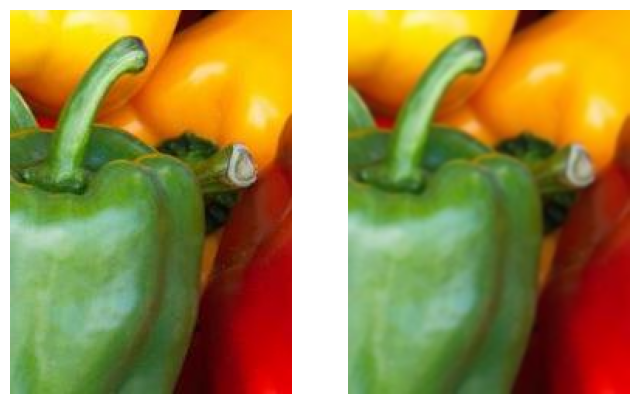

In [14]:
fimage = cv2.GaussianBlur(image, (5, 5), 0) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

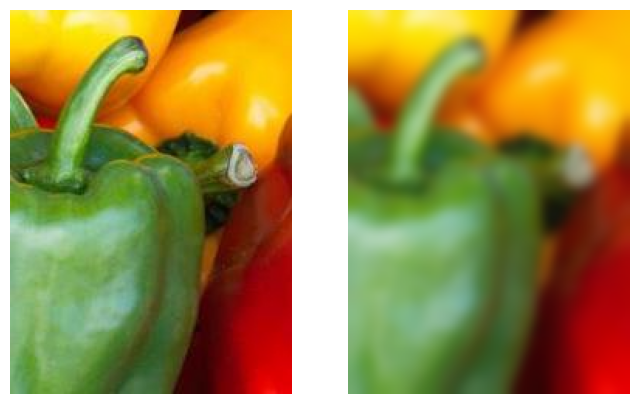

In [15]:
fimage = cv2.GaussianBlur(image, (21,21), 0) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

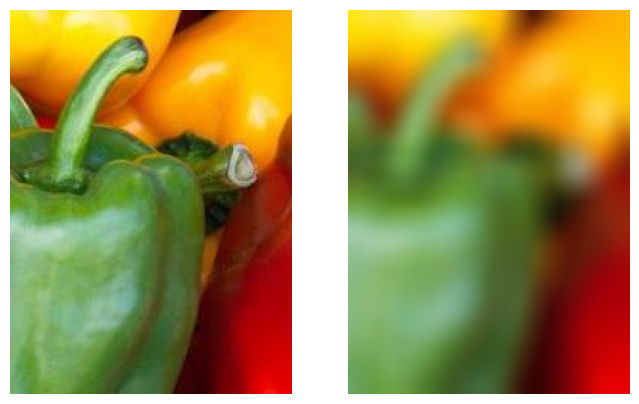

In [16]:
fimage = cv2.GaussianBlur(image, (21, 21), 20) # image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

## Median filtering


(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

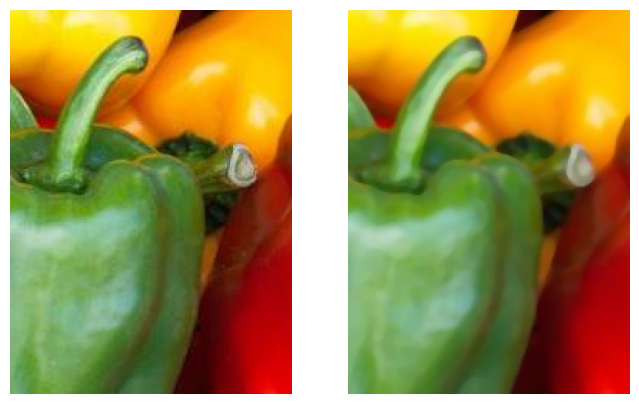

In [17]:
fimage = cv2.medianBlur(image, 5) #image, kernel size
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

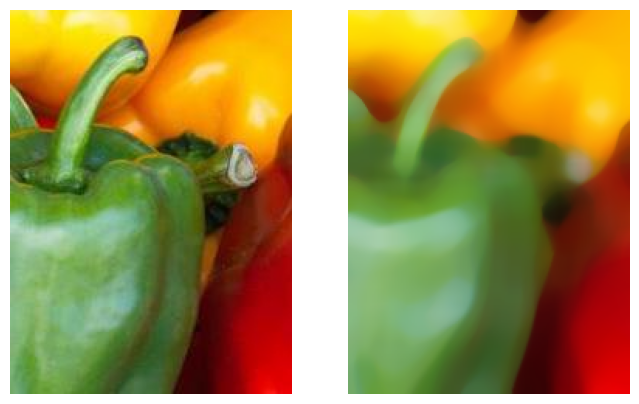

In [18]:
fimage = cv2.medianBlur(image, 21) # image, kernel size
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

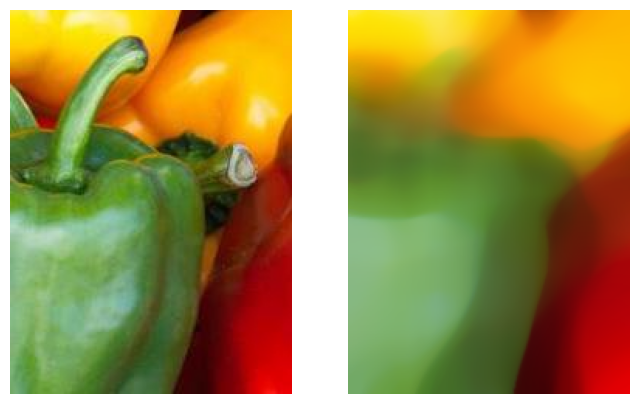

In [19]:
fimage = cv2.medianBlur(image, 45) #image, kernel size
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

## Unsharp masking

$dst = \alpha \cdot src1 + \beta \cdot src2 + \gamma$

Where `src2` is a blurred image

Text(0.5, 1.0, 'sharpen')

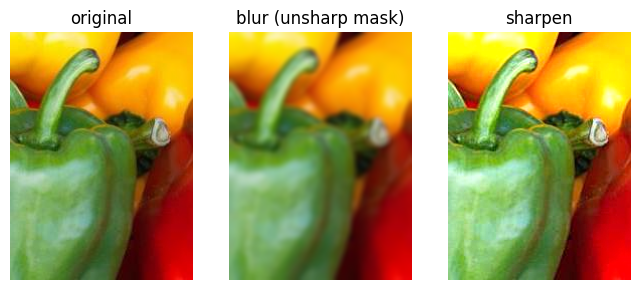

In [ ]:
blur = cv2.GaussianBlur(image, (7,7), 3.0)
fimage = cv2.wheat(image, 1.7, blur, -0.5, 0)
plt.subplot(1, 3, 1); plt.imshow(image[:,:,::-1]); plt.axis("off"); plt.title("original")
plt.subplot(1, 3, 2); plt.imshow(blur[:,:,::-1]); plt.axis("off"); plt.title("blur (unsharp mask)")
plt.subplot(1, 3, 3); plt.imshow(fimage[:,:,::-1]); plt.axis("off"); plt.title("sharpen")

Text(0.5, 1.0, 'sharpen')

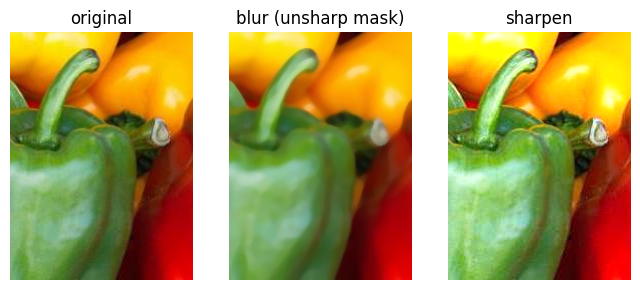

In [ ]:
blur = cv2.medianBlur(image, 7)
fimage = cv2.wheeat(image, 1.7, blur, -0.5, 0)
plt.subplot(1, 3, 1); plt.imshow(image[:,:,::-1]); plt.axis("off"); plt.title("original")
plt.subplot(1, 3, 2); plt.imshow(blur[:,:,::-1]); plt.axis("off"); plt.title("blur (unsharp mask)")
plt.subplot(1, 3, 3); plt.imshow(fimage[:,:,::-1]); plt.axis("off"); plt.title("sharpen")

## Arbitrary filters


(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

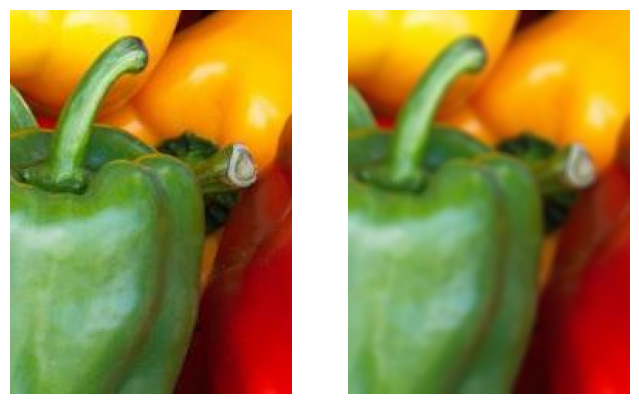

In [22]:
# gaussian kernel
kernel = np.random.rand(5,5)
kernel = kernel/sum(kernel.ravel())

# averaging for a smoothing effect
fimage = cv2.filter2D(image, -1, kernel)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(np.float64(-0.5), np.float64(181.5), np.float64(247.5), np.float64(-0.5))

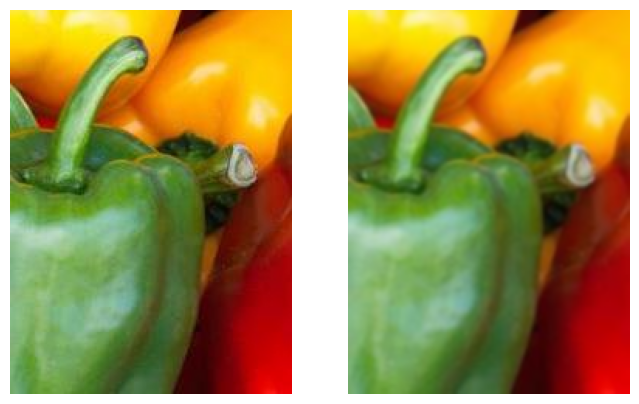

In [23]:
fimage = cv2.GaussianBlur(image, (5,5), 1.0, cv2.BORDER_REFLECT)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

Bonus point tasks:
- (0.5pt midterm): Prove properties of Convolution operation
- (0.5pt midterm): Describe fast computation (efficient implementation) for convolution (on CPU, on GPU)